In [1]:
from utils import *
from queue import Queue
from api import *

In [2]:
def edge_detector(img):
    lap = cv2.Laplacian(img, cv2.CV_64F)
    lap = np.uint8(np.absolute(lap))
    lap_gray = cv2.cvtColor(lap, cv2.COLOR_RGB2GRAY)
    return lap_gray

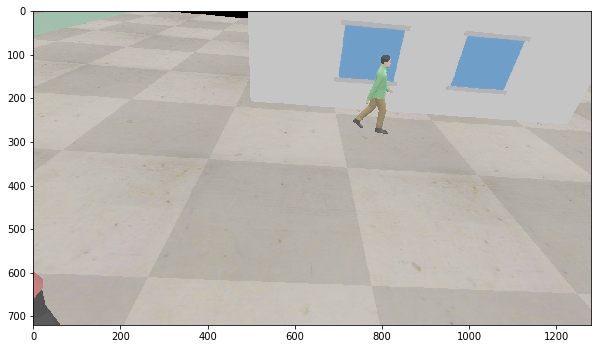

[194 189 180]


In [3]:
img = read_image('task_3(1)/21zed1.jpg')
show_image(img)
print(img[50, 200])

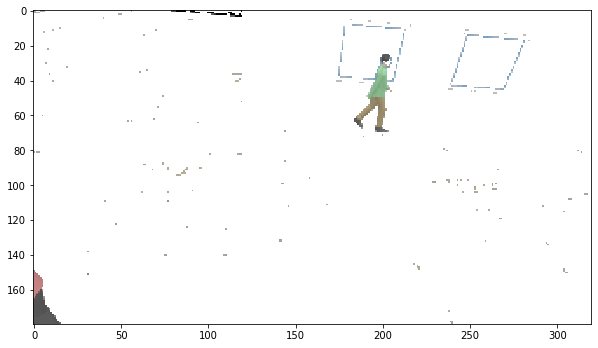

[((790, 195), array([141.93956044, 180.89010989, 150.96703297]))]


In [4]:
print(get_people(img.copy(), 150))